# DA_HW_3 Support Vector Machine and Decision Trees

# Due on 5/10 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel without specifying the C-parameter

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('had_affair', axis=1).values
Y = df['had_affair'].values

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [7]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [8]:
Y_pred = svclassifier.predict(X_test)

In [9]:
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       885
           1       0.68      0.33      0.44       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.73      0.75      0.72      1274

0.7472527472527473


### Question 2. Now try different value of C-parameter and rerun your model

In [10]:
## We will try 2**-8 and 2**8

In [11]:
svclassifier = SVC(kernel='linear', C=2**-8)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       885
           1       0.68      0.25      0.36       389

    accuracy                           0.73      1274
   macro avg       0.71      0.60      0.60      1274
weighted avg       0.72      0.73      0.69      1274

0.7346938775510204


In [12]:
svclassifier = SVC(kernel='linear', C=2**8)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       885
           1       0.68      0.33      0.44       389

    accuracy                           0.75      1274
   macro avg       0.72      0.63      0.64      1274
weighted avg       0.73      0.75      0.72      1274

0.7472527472527473


### Question 3. Now use rbf as your kernel along with different value for Gamma and C

In [13]:
#RBF kernel with different C values

In [14]:
svclassifier = SVC(kernel='rbf', C=2**-11)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       885
           1       0.00      0.00      0.00       389

    accuracy                           0.69      1274
   macro avg       0.35      0.50      0.41      1274
weighted avg       0.48      0.69      0.57      1274

0.6946624803767661


In [15]:
svclassifier = SVC(kernel='rbf', C=2**11)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.30      0.41       389

    accuracy                           0.74      1274
   macro avg       0.71      0.62      0.62      1274
weighted avg       0.73      0.74      0.71      1274

0.7401883830455259


In [16]:
#RBF kernel with different gamma values 

In [17]:
svclassifier = SVC(kernel='rbf', gamma=2**11)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       885
           1       0.36      0.12      0.18       389

    accuracy                           0.67      1274
   macro avg       0.53      0.51      0.49      1274
weighted avg       0.60      0.67      0.60      1274

0.6656200941915228


In [18]:
svclassifier = SVC(kernel='rbf', gamma=2**-11)
svclassifier.fit(X_train, Y_train)
Y_pred = svclassifier.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       885
           1       0.94      0.04      0.08       389

    accuracy                           0.71      1274
   macro avg       0.82      0.52      0.45      1274
weighted avg       0.78      0.71      0.60      1274

0.706436420722135


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters? Comment on the effect of using different C and Gamma parameters

Out of all the models I tried in Question 2 and 3, the best choice for the kernel was rbf. The best choice for C was 2^11. 
The best choice for the gamma parameters was 2^-11. 

When we use different C values, if the value if C is too high then we might get higher variance and lower bias which leads to overfitting. If the value of C is too low, then we have lower variance and higher bias, which leads to underfitting. 

When we use different Gamma parameters, if the value of G is too high, then the points that are closer to the decision boundary hold more weight and the line will be less straight. If the value of G is too low, then the points that are farther away from the decision boundary hold more weight and the line will be more straight.   

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, Y_train)

DecisionTreeClassifier()

### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [21]:
firstTree = DecisionTreeClassifier(max_depth=2, criterion='gini')
firstTree.fit(X_train, Y_train)
Y_pred = firstTree.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In [22]:
secondTree = DecisionTreeClassifier(max_depth=2, criterion='entropy')
secondTree.fit(X_train, Y_train)
Y_pred = secondTree.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7401883830455259


In [23]:
thirdTree = DecisionTreeClassifier(max_depth=3, criterion='gini')
thirdTree.fit(X_train, Y_train)
Y_pred = thirdTree.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.29      0.40       389

    accuracy                           0.74      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.72      0.74      0.70      1274

0.7362637362637363


In [24]:
fourthTree = DecisionTreeClassifier(max_depth=3, criterion='entropy')
fourthTree.fit(X_train, Y_train)
Y_pred = fourthTree.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       885
           1       0.66      0.29      0.40       389

    accuracy                           0.74      1274
   macro avg       0.70      0.61      0.61      1274
weighted avg       0.72      0.74      0.70      1274

0.7362637362637363


In [25]:
fifthTree = DecisionTreeClassifier(max_depth=4, criterion='entropy')
fifthTree.fit(X_train, Y_train)
Y_pred = fifthTree.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7394034536891679


In [26]:
sixthTree = DecisionTreeClassifier(max_depth=4, criterion='gini')
sixthTree.fit(X_train, Y_train)
Y_pred = sixthTree.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       885
           1       0.65      0.32      0.43       389

    accuracy                           0.74      1274
   macro avg       0.70      0.62      0.63      1274
weighted avg       0.72      0.74      0.71      1274

0.7394034536891679


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

From Question 6, we see that the choice of the criterion is not important in this case but the max depth is. 
The best choice for max depth is 2 and from the information above, we can see that either criterion can be used. 

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

In [27]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees

In [28]:
from IPython.display import Image 
from six import StringIO 
from sklearn.tree import export_graphviz
import io
import pydot 

In [29]:
features = list(df.drop(['had_affair'],axis=1).columns)
features

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

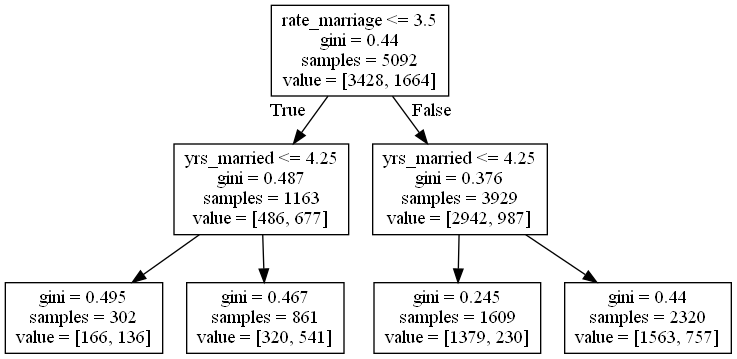

In [30]:
#Max depth 2
dot_data = StringIO()
export_graphviz(firstTree, out_file=dot_data, feature_names=features)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

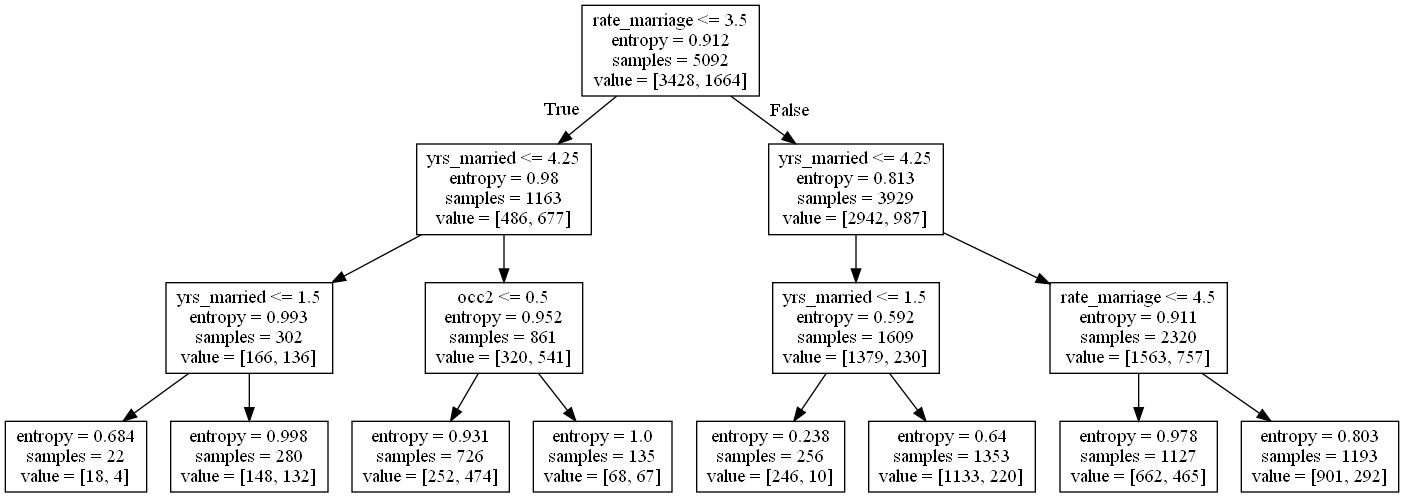

In [31]:
#Max depth 3
dot_data = StringIO()
export_graphviz(fourthTree, out_file=dot_data, feature_names=features)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

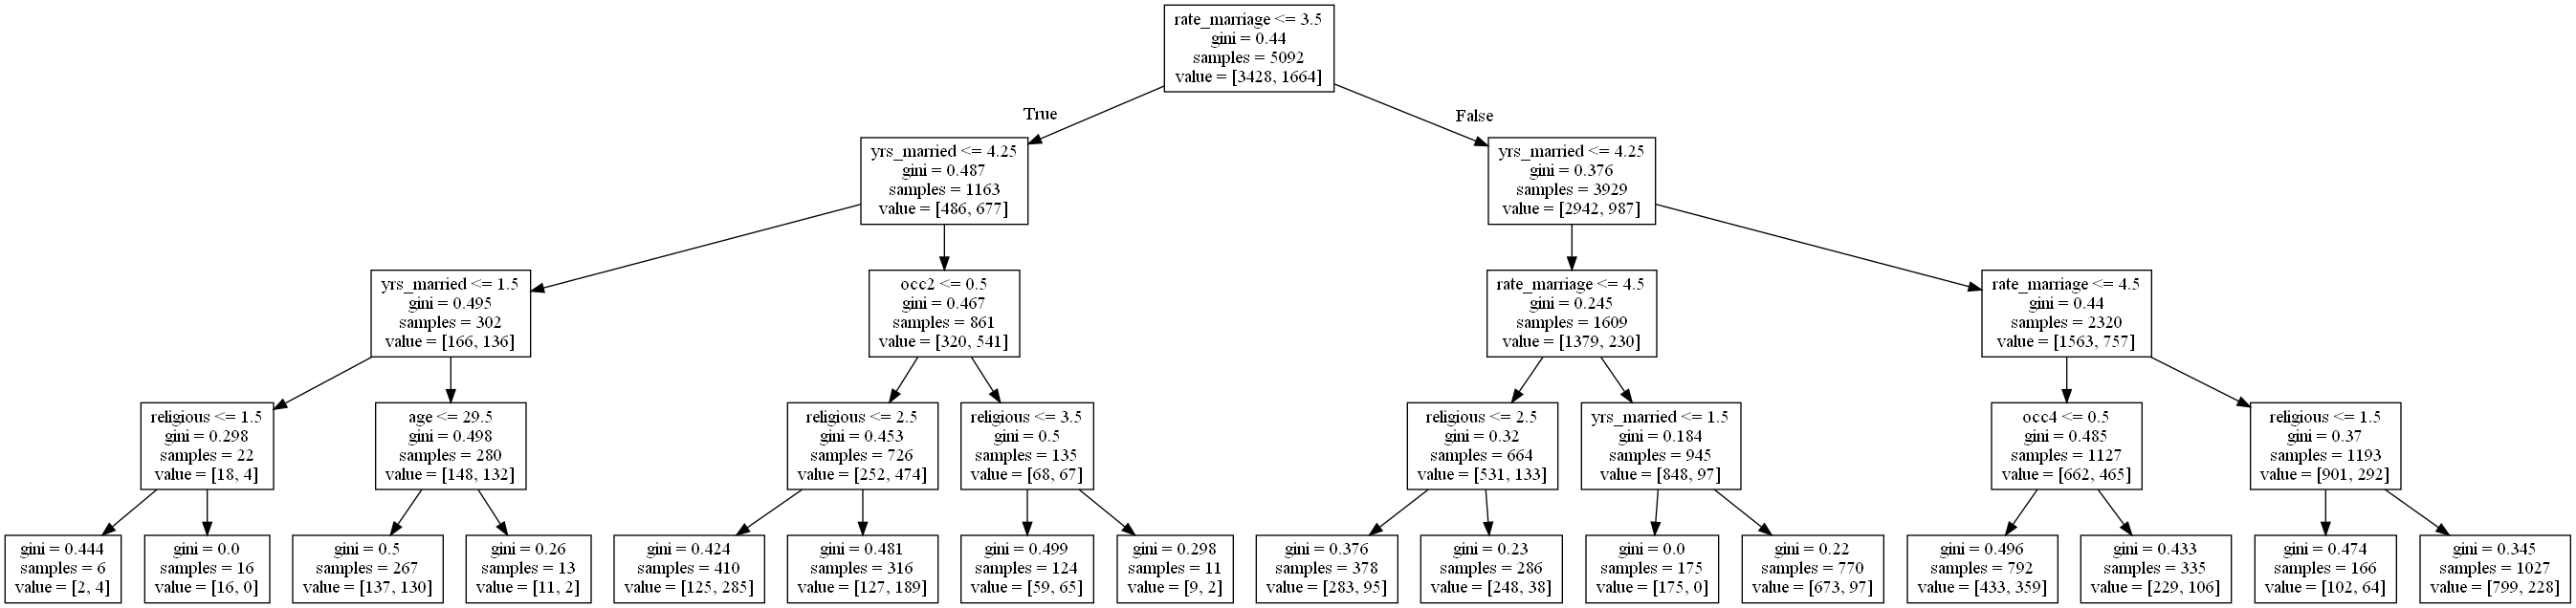

In [32]:
#Max depth 4
dot_data = StringIO()
export_graphviz(sixthTree, out_file=dot_data, feature_names=features)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

Type your answer and code here

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train, Y_train)

RandomForestClassifier()

In [38]:
Y_pred = randomForest.predict(X_test)
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       885
           1       0.49      0.40      0.44       389

    accuracy                           0.69      1274
   macro avg       0.62      0.61      0.61      1274
weighted avg       0.67      0.69      0.68      1274

0.6875981161695447
